<H1 style="text-align:center;">
Finding Patterns
</H1>
<hr style="height:5px;">

## Hierarchical clustering
<hr style="height:2px;">

As an example, we apply hierarchical clustering to the Iris data set, ignoring the
categorical attribute *`Species`*. We use the normalized Iris data set `iris.norm` that
is constructed in Sect. 6.6.2.3. We can apply hierarchical clustering after removing
the categorical attribute and can plot the dendrogram afterwards:

In [2]:
#
# NORMALIZATION
#

# using the iris data as an example
iris.norm <- iris

# for loop over each coloumn
for (i in c(1:length(iris.norm))){
    if (!is.factor(iris.norm[,i])){
        attr.mean <- mean(iris.norm[,i])
        attr.sd <- sd(iris.norm[,i])
        iris.norm[,i] <- (iris.norm[,i]-attr.mean)/attr.sd
    }
}


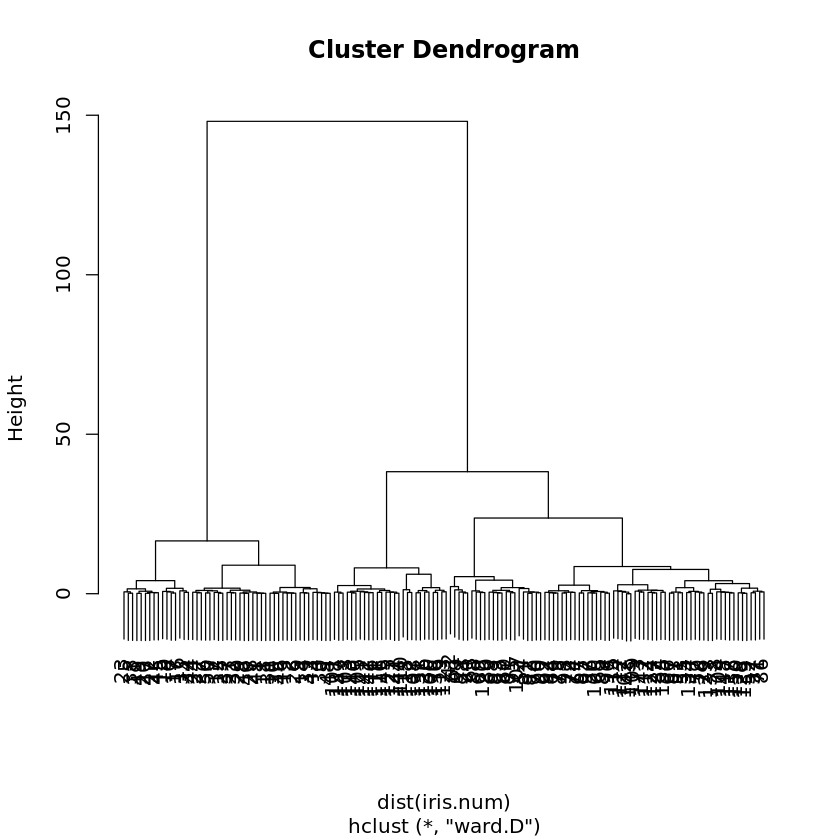

In [4]:
iris.num <- iris.norm[1:4]
iris.cl <- hclust(dist(iris.num), method="ward.D")
plot(iris.cl)

Here, the Ward method for the cluster distance aggregation function as described
in Table 7.3 was chosen. For the other cluster distance aggregation functions in the
table, one simply has to replace `ward.D` by `single` (for single linkage), by `complete`
(for complete linkage), by `average` (for average linkage), or by `centroid`.

For heatmaps, the library `gplots` is required that needs installing first:

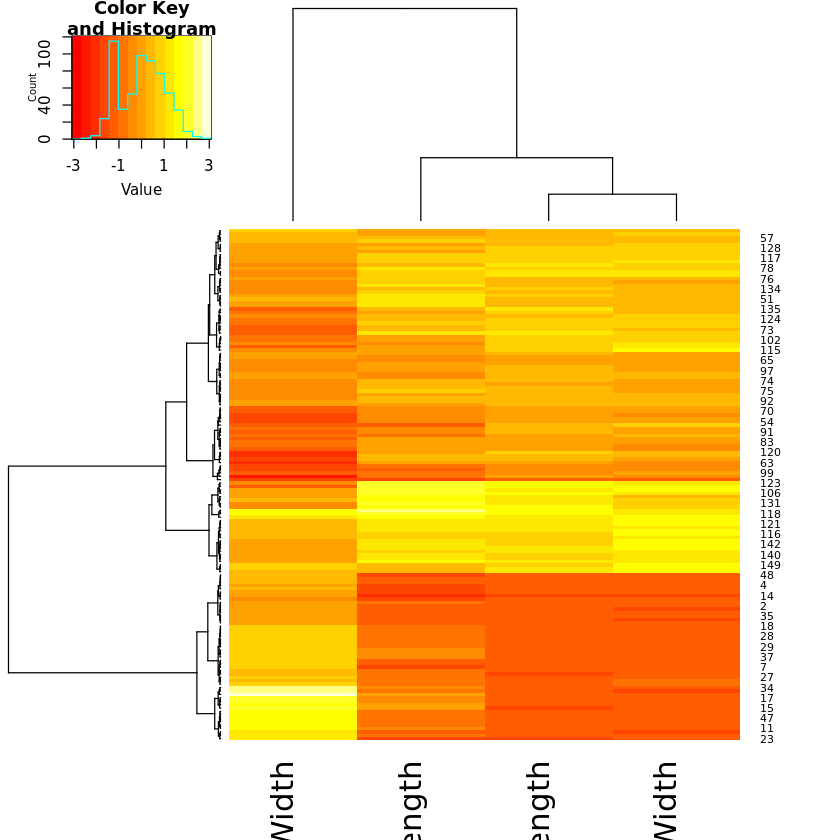

In [5]:
library(gplots)
rowv <- as.dendrogram(hclust(dist(iris.num), method="ward.D"))
colv <- as.dendrogram(hclust(dist(t(iris.num)), method="ward.D"))
heatmap.2(as.matrix(iris.num), Rowv=rowv,Colv=colv, trace="none")

## Prototype-Based Clustering
<hr style="height:2px;">

The R-function `kmeans` carries out k-means clustering.

In [6]:
iris.km <- kmeans(iris.num,centers=3)

The desired numbers of clusters is specified by the parameter `centers`. The location
of the cluster centers and the assignment of the data to the clusters is obtained
by the `print` function:

In [7]:
print(iris.km)

K-means clustering with 3 clusters of sizes 50, 53, 47

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -1.01119138  0.85041372   -1.3006301  -1.2507035
2  -0.05005221 -0.88042696    0.3465767   0.2805873
3   1.13217737  0.08812645    0.9928284   1.0141287

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 47.35062 44.08754 47.45019
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


For fuzzy c-means clustering, the library `cluster` is required. The clustering
is carried out by the method `fanny` similar to `kmeans`:

In [ ]:
library(cluster)
iris.fcm <- fanny(iris.num,3)
iris.fcm

The last line provides the necessary information on the clustering results, especially
the membership degrees to the clusters.

Gaussian mixture decomposition automatically determining the number of clusters
requires the library `mclust` to be installed first:

In [ ]:
library(mclust)
iris.em <- mclustBIC(iris.num[,1:4])
iris.mod <- mclustModel(iris.num[,1:4],iris.em)
summary(iris.mod)

The last line lists the assignment of the data to the clusters.

Density-based clustering with DBSCAN is implemented in the library `fpc`
which needs installation first:

In [ ]:
library(fpc)
iris.dbscan <- dbscan(iris.num[,1:4],1.0,showplot=T)
iris.dbscan$cluster

The last line will print out the assignment of the data to the clusters. Singletons or
outliers are marked by the number zero. The second argument in `dbscan` (in the
above example 1:0) is the parameter " for DBSCAN. `showplot=T` will generate
a plot of the clustering result projected to the first two dimensions of the data set.

## Self Organizing Maps
<hr style="height:2px;">

The library `som` provides methods for self organizing maps. The library `som` needs
to be installed:

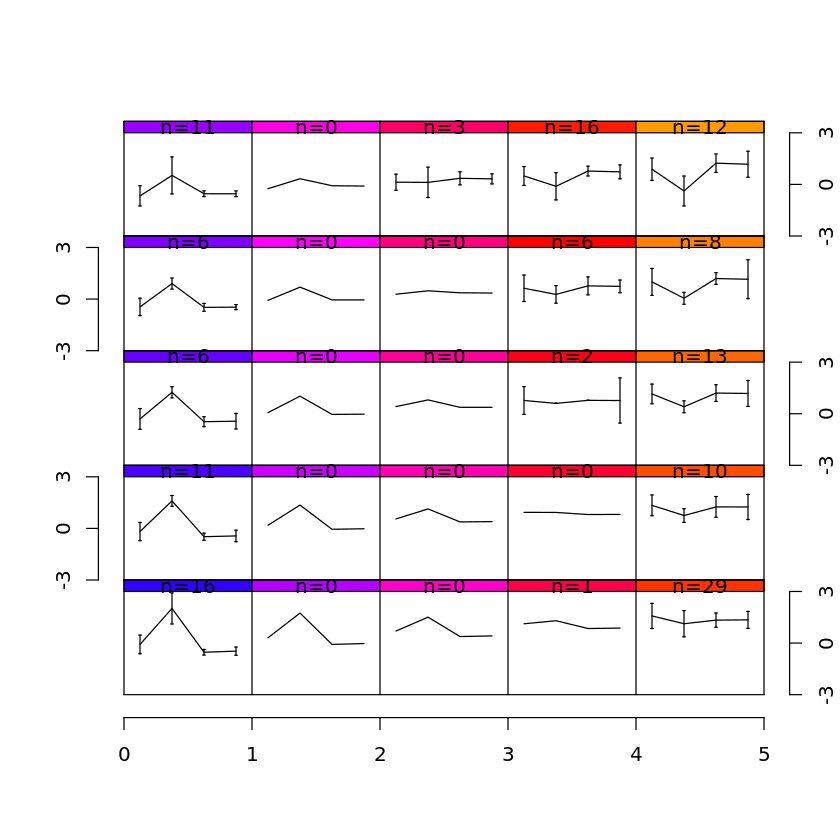

In [9]:
library(som)
iris.som <- som(iris.num,xdim=5,ydim=5)
plot(iris.som)

`xdim` and `ydim` define the number of nodes in the mesh in x- and y-directions,
respectively. `plot` will show, for each node in the mesh, a representation of the
values in the form of parallel coordinates.

## Association Rules
<hr style="height:2px;">

For association rule mining, the library `arules` is required in which the function
`apriori` is defined. This library does not come along with R directly and needs to
be installed first.

Here we use an artificial data set `basket` that we enter manually. The data set
is a list of vectors where each vector contains the items that were bought:

In [10]:
library(arules)
baskets <- list(c("a","b","c"), c("a","d","e"),
                c("b","c","d"), c("a","b","c","d"),
                c("b","c"), c("a","b","d"),
                c("d","e"), c("a","b","c","d"),
                c("c","d","e"), c("a","b","c"))
rules <- apriori(baskets,parameter = list(supp=0.1,conf=0.8,target="rules"))
inspect(rules)


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs        rhs support confidence coverage lift     count
[1] {e}     => {d} 0.3     1.0000000  0.3      1.428571 3    
[2] {a}     => {b} 0.5     0.8333333  0.6      1.190476 5    
[3] {b}     => {c} 0.6     0.8571429  0.7      1.224490 6    
[4] {c}     => {b} 0.6     0.8571429  0.7     

The last command lists the rules with their support, confidence, and lift.